# Mumbai - Houses Price Prediction

In [1]:
df = pd.read_csv("Mumbai1.csv",index_col=0)
df

<IPython.core.display.Javascript object>

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6347 entries, 0 to 6346
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   int64 
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   int64 
 4   New/Resale            6347 non-null   int64 
 5   Gymnasium             6347 non-null   int64 
 6   Lift Available        6347 non-null   int64 
 7   Car Parking           6347 non-null   int64 
 8   Maintenance Staff     6347 non-null   int64 
 9   24x7 Security         6347 non-null   int64 
 10  Children's Play Area  6347 non-null   int64 
 11  Clubhouse             6347 non-null   int64 
 12  Intercom              6347 non-null   int64 
 13  Landscaped Gardens    6347 non-null   int64 
 14  Indoor Games          6347 non-null   int64 
 15  Gas Connection        6347 non-null   

In [3]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler().fit(df[['Price']])
# xs = sc.transform(df[['Price']])
# df['Price'] = pd.DataFrame(xs)
#Reduced price value by 1000 times to make it comaparable to other values in the data set

In [4]:
df['Price']

0        4850000
1        4500000
2        6700000
3        4500000
4        5000000
          ...   
6342     2485000
6343    14500000
6344    14500000
6345     4100000
6346     2750000
Name: Price, Length: 6347, dtype: int64

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

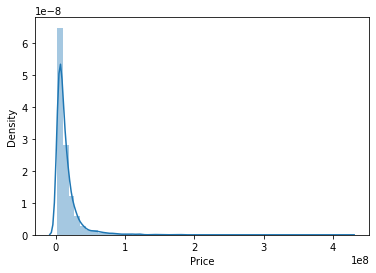

In [5]:
sns.distplot(df['Price'])

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

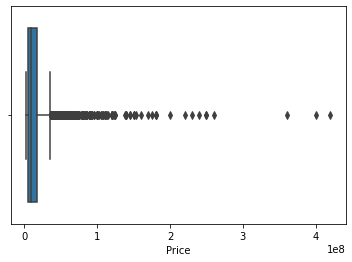

In [6]:
sns.boxplot(df['Price'])

###  Seems to be some outliers were in data set

In [7]:
df['Price'].quantile(.95)

44439999.99999996

In [8]:
#df = df[df['Price']<44440]

In [9]:
6347-6029 #No of outliers in the data set

318

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

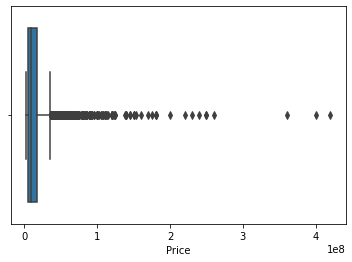

In [10]:
sns.boxplot(df['Price'])

In [11]:
df['Price'].quantile(.95)

44439999.99999996

In [12]:
df['Price'].quantile(.03)

2394000.0

<IPython.core.display.Javascript object>

C:\Users\sriharsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

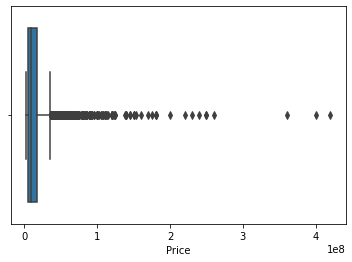

In [13]:
sns.boxplot(df['Price'])

In [14]:
6346/5785   #1% of data is lost

1.0969749351771825

## Feature Engineering

In [15]:
#Since Location is one of the important feature we are represnting that with the ratio of price to Area
df['ratio'] = df['Price']/df['Area']

In [16]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'New/Resale',
       'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff',
       '24x7 Security', 'Children's Play Area', 'Clubhouse', 'Intercom',
       'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track',
       'Swimming Pool', 'ratio'],
      dtype='object')

## Minimizing the number of columns

In [17]:
df['maintain'] = df['Lift Available'] + df['Car Parking']+df['Maintenance Staff'] + df['24x7 Security']
df['maintain']
df.columns
df.drop(['Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security'],axis=1,inplace = True)

In [18]:
df['extra_space'] = df['Children\'s Play Area'] + df['Landscaped Gardens'] + df['Jogging Track']
#df[df['No. of Bedrooms']>=5]
df.drop(['Children\'s Play Area','Landscaped Gardens','Jogging Track'],axis =1,inplace = True )

In [19]:
df['Price'] /= 1000
#reducing the Price values for better scalability

In [20]:
df.corr()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Clubhouse,Intercom,Indoor Games,Gas Connection,Swimming Pool,ratio,maintain,extra_space
Price,1.000000,0.722336,0.594865,0.032428,0.098097,0.084775,0.063060,0.122352,0.118245,0.123902,0.748424,0.069119,0.068300
Area,0.722336,1.000000,0.812692,0.028197,0.198772,0.181121,0.145060,0.151458,0.094251,0.209696,0.289135,0.146225,0.139457
No. of Bedrooms,0.594865,0.812692,1.000000,0.099334,0.227887,0.203105,0.144554,0.175645,0.061616,0.234695,0.382097,0.120177,0.148645
New/Resale,0.032428,0.028197,0.099334,1.000000,0.243751,0.269434,0.232293,0.290162,-0.029659,0.276606,0.056046,-0.055944,0.284345
Gymnasium,0.098097,0.198772,0.227887,0.243751,1.000000,0.756068,0.490203,0.410831,0.098228,0.722224,0.058073,0.383902,0.622753
Clubhouse,0.084775,0.181121,0.203105,0.269434,0.756068,1.000000,0.557319,0.463670,0.130183,0.752771,0.034409,0.324934,0.677838
Intercom,0.063060,0.145060,0.144554,0.232293,0.490203,0.557319,1.000000,0.339773,0.267485,0.497140,0.035821,0.187839,0.547813
Indoor Games,0.122352,0.151458,0.175645,0.290162,0.410831,0.463670,0.339773,1.000000,-0.000791,0.476680,0.104516,0.280535,0.590455
Gas Connection,0.118245,0.094251,0.061616,-0.029659,0.098228,0.130183,0.267485,-0.000791,1.000000,0.085364,0.149190,-0.049718,0.090959
Swimming Pool,0.123902,0.209696,0.234695,0.276606,0.722224,0.752771,0.497140,0.476680,0.085364,1.000000,0.087350,0.294334,0.694237


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

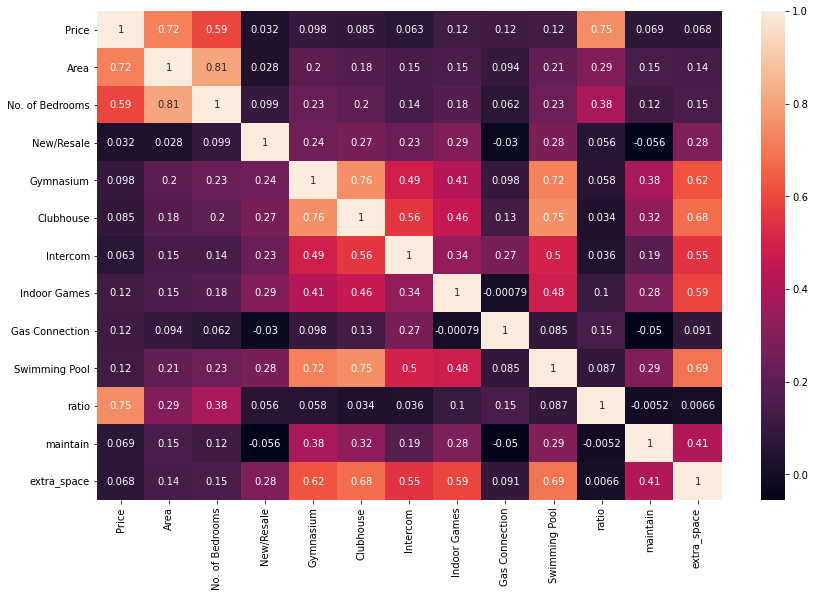

In [21]:
plt.figure(figsize = (14,9))
sns.heatmap(df.corr(),annot = True)


### From the Heat map we can observe there is high correlation between price and  Area, No. of Bed rooms which is a genral fact.

#### There is also a decent corr between swimming pool and price

# we will check the relation between Area and No.  of Bedrooms

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Area', ylabel='No. of Bedrooms'>

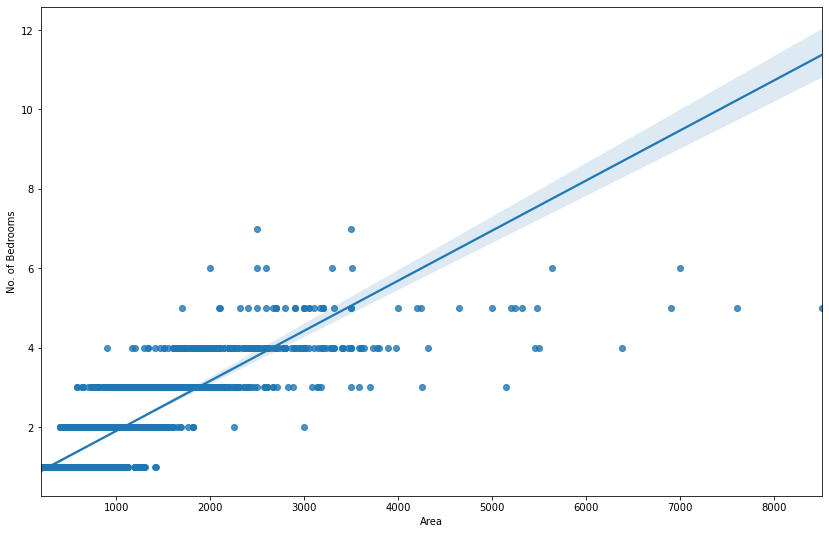

In [22]:
plt.figure(figsize=(14,9))
sns.regplot(y = df['No. of Bedrooms'],x = df['Area'])

### Observation from Regression plot:
-----> The regression plot is clearly showing the there is strong positive relation between **No. of Bedrooms** and **Area** 

In [23]:
df.drop('Location',axis=1,inplace = True)
#There is no weitage for Location in the data set

In [24]:
df.columns


Index(['Price', 'Area', 'No. of Bedrooms', 'New/Resale', 'Gymnasium',
       'Clubhouse', 'Intercom', 'Indoor Games', 'Gas Connection',
       'Swimming Pool', 'ratio', 'maintain', 'extra_space'],
      dtype='object')

In [25]:
x = df.drop('Price',axis = 1)

y = df['Price']
x

,Area,No. of Bedrooms,New/Resale,Gymnasium,Clubhouse,Intercom,Indoor Games,Gas Connection,Swimming Pool,ratio,maintain,extra_space
0,720,1,0,0,0,0,0,0,0,6736.111111,4,0
1,600,1,0,1,1,0,0,0,1,7500.000000,4,1
2,650,1,0,1,1,1,0,0,1,10307.692308,4,2
3,650,1,0,0,0,1,0,0,0,6923.076923,4,1
4,665,1,0,0,0,1,0,0,0,7518.796992,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6342,700,1,1,0,0,0,0,0,0,3550.000000,0,0
6343,900,2,0,0,0,0,0,0,0,16111.111111,0,0
6344,900,2,0,0,0,1,0,1,0,16111.111111,1,0
6345,1380,3,0,0,0,0,0,0,0,2971.014493,0,0


In [26]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(x,y,random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(trainx,trainy)

LinearRegression()

In [28]:
yp = lr.predict(testx)

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(testy,yp)*100
#mean_absolute_error(testy,yp)


83.92084567269616

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=160,)
rf.fit(trainx,trainy)

RandomForestRegressor(n_estimators=160)

In [31]:
ypr = rf.predict(testx)

In [32]:
r2_score(testy,ypr)*100

#mean_absolute_error(testy,ypr)

98.29389519844618